> **提示**：欢迎参加“调查数据集”项目！引用段会添加这种提示，帮助你制定调查方法。提交项目之前，最后浏览一下报告，将这一段删除，以保持报告简洁。首先，需要双击这个 Markdown 框，将标题更改为与数据集和调查相关的标题。

# 项目：探索未前往就诊的挂号预约

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在这一段报告中对你选择进行分析的数据集进行简要介绍。在本段末尾，对你计划在报告过程中探索的问题进行描述。自己尝试建立至少一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，务必熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

In [2]:
# 用这个框对你计划使用的所有数据包设置
#   导入语句。
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
# 务必包含一个‘咒语’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问这个网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [3]:
# 读取数据
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## 数据整理

> **提示**：在这一段报告中载入数据，检查简洁度，然后整理和清理数据集，以进行分析。务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [4]:
# 返回数据框维度的元组(行列数量)
df.shape

(110527, 14)

In [7]:
# 统计数据缺失
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
#统计冗余的行数
df.duplicated().sum()

0

In [16]:
# 查看数据类型
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

> **提示**：_不应_在每个框中进行太多操作。可以自由创建框，进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索操作。不要求对其进行组织，但务必仔细阅读备注，理解每个代码框的用途。完成分析之后，可以创建 notebook 副本，在其中去除多余数据，组织步骤，从而形成结构连贯、紧密的报告。

> **提示**：务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。尽量做到这一点，以便读者理解后续框中的内容。

### 数据清理（用更具体的标题代替这个标题！）

In [17]:
# 讨论数据结构和需要解决的任何问题之后，
#   在本段的第二部分进行这些清理步骤。
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])

In [18]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [52]:
# 查看数据类型
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [53]:
# 查看年龄分布
df['Age'].describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

In [54]:
# 查询年龄 <= 0 的索引
age_leq_zero = df.query('Age <= 0').index

In [55]:
# 丢弃年龄 <= 0 
df.drop(age_leq_zero, inplace=True)

In [56]:
# 查询年龄 <= 0 的索引
age_leq_zero = df.query('Age <= 0').index
age_leq_zero

Int64Index([], dtype='int64')

In [78]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [79]:
# 重命名列
new_columns = {
    'PatientId':'patient_id',
    'AppointmentID':'appointment_id',
    'Gender':'gender',
    'ScheduledDay':'scheduled_day',
    'AppointmentDay':'appointment_day',
    'Age':'age',
    'Neighbourhood':'neighbourhood',
    'Scholarship':'scholarship',
    'Hipertension':'hipertension',
    'Diabetes':'diabetes',
    'Alcoholism':'alcoholism',
    'Handcap':'handcap',
    'SMS_received':'sms_received',
    'No-show':'no_show'
}
df.rename(columns=new_columns, inplace=True)
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

In [82]:
# 删除不需要的列
df.drop(['patient_id', 'appointment_id'], axis=1, inplace=True)
df.head(0)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [83]:
#统计冗余的行数
df.duplicated().sum()

626

In [85]:
#删除冗余的行并填充到原始数据集
df.drop_duplicates(inplace=True)

In [86]:
#统计冗余的行数
df.duplicated().sum()

0

<a id='eda'></a>
## 探索性数据分析

> **提示**：放弃约定是否和性别有关

### 调查数据性别分布

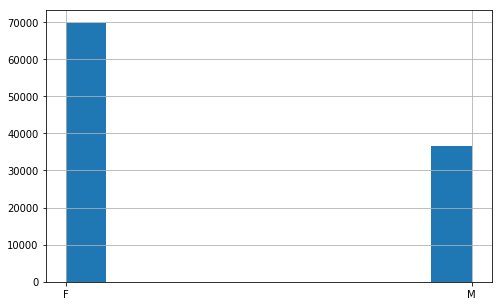

In [206]:
df['gender'].hist(figsize=(8,5))

In [88]:
df['no_show'].value_counts()

0    84899
1    21462
Name: no_show, dtype: int64

In [89]:
df.query('gender == "F"')['no_show'].value_counts()

0    55562
1    14137
Name: no_show, dtype: int64

In [90]:
df.query('gender == "M"')['no_show'].value_counts()

0    29337
1     7325
Name: no_show, dtype: int64

### 探索age、neighbourhood、scholarship、hipertension、diabetes、alcoholism、handcap、sms_received等因素是否影响放弃预约

In [91]:
# 继续探索数据，解决你的附加研究问题。
#   如果有其它问题要调查，
#   请根据需要添加更多标题。
# 用这个代码框和其它代码框探索数据。务必添加
#   Markdown 框，以便归档你的观察和调查结果。
df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0


In [92]:
df['no_show'].value_counts()

0    84899
1    21462
Name: no_show, dtype: int64

In [97]:
df['no_show'].replace({'No':0, 'Yes':1}, inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [98]:
df['no_show'].value_counts()

0    84899
1    21462
Name: no_show, dtype: int64

In [99]:
type(df['no_show'][0])

numpy.int64

In [111]:
df.shape

(106361, 12)

In [139]:
df.groupby('no_show').count()['alcoholism']

no_show
0    84899
1    21462
Name: alcoholism, dtype: int64

In [147]:
total_record = sum(df.groupby(['alcoholism','no_show']).count()['age'])
total_record

106361

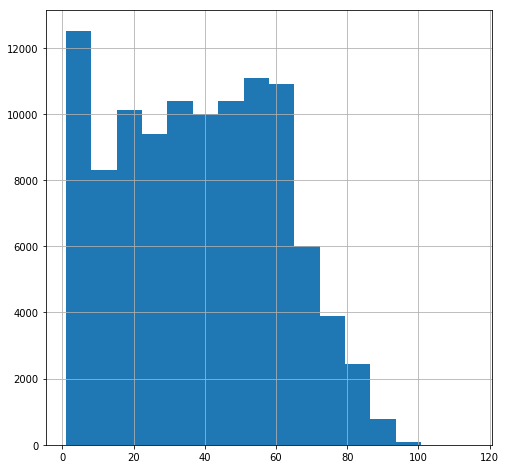

In [345]:
df['age'].hist(figsize=(8,8),bins=16);

In [349]:
# 用 Pandas 描述功能查看最小、25%、50%、75% 和 最大 pH 值
df['age'].describe()

count    106361.000000
mean         38.320822
std          22.475574
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

In [350]:
# 对用于把数据“分割”成组的边缘进行分组
# 用刚才计算的五个值填充这个列表
bin_edges = [1, 8, 18, 29, 39, 49, 59, 115]

# 7个年龄水平组的标签
# 对每个年龄水平类别进行命名
bin_names = ['child', 'nonage', 'youth', 'thirty', 'fouty', 'fifty', 'old']
# 创建 acidity_levels 列
df['age_levels'] = pd.cut(df['age'], bin_edges, labels=bin_names)


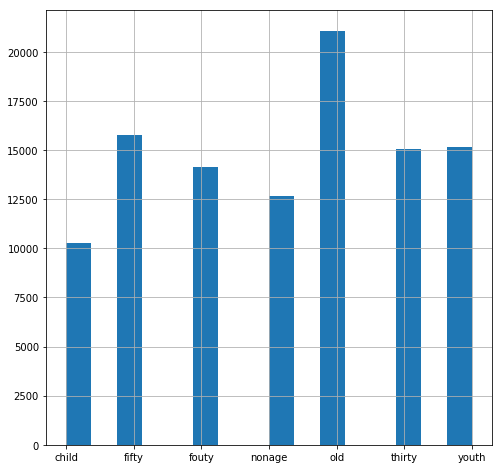

In [351]:
df['age_levels'].hist(figsize=(8,8),bins=16);

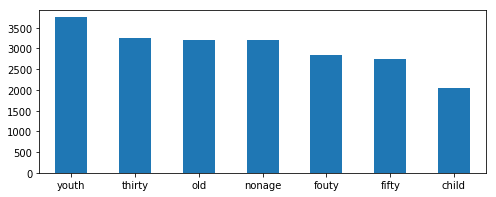

In [352]:
# 各个年龄的爽约率
df[df['no_show'] == 1]['age_levels'].value_counts().plot(kind='bar', rot=0, figsize=(8, 3));

In [152]:
# 酗酒与爽约 分析方法1
an = df.groupby(['alcoholism','no_show']).count()['age']

alcoholism  no_show
0           0          82223
            1          20794
1           0           2676
            1            668
Name: age, dtype: int64

In [273]:
# 未酗酒爽约
an[0][1]/total_record

0.19550399112456635

In [274]:
# 酗酒爽约
an[1][1]/total_record

0.0062804975507939941

In [166]:
bn = df.groupby(['hipertension','no_show']).count()['age']
bn

hipertension  no_show
0             0          66951
              1          17734
1             0          17948
              1           3728
Name: age, dtype: int64

In [178]:
# 无高血压失约
df.query('hipertension == 0 and no_show == 1')['age'].count() / df.shape[0]

0.16673404725416271

In [180]:
# 有高血压失约
df.query('hipertension == 1 and no_show == 1')['age'].count() / df.shape[0]

0.03505044142119762

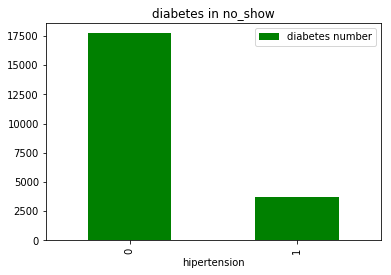

In [181]:
# 失约人群中，患高血压和未患高血压的比例
df.query('no_show == 1').groupby('hipertension').count()['age'].plot(kind="bar", title="diabetes in no_show",color='green', legend=True, label="diabetes number")

In [182]:
# 无学识
df.query('scholarship == 0 and no_show == 1')['age'].count() / df.shape[0]

0.17781893739246529

In [183]:
# 有学识
df.query('scholarship == 1 and no_show == 1')['age'].count() / df.shape[0]

0.023965551282895046

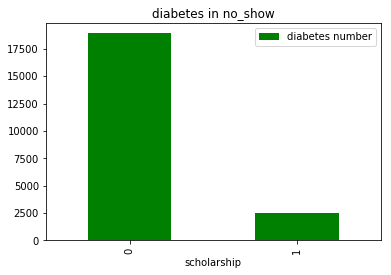

In [184]:
df.query('no_show == 1').groupby('scholarship').count()['age'].plot(kind="bar", title="diabetes in no_show",color='green', legend=True, label="diabetes number")

In [185]:
# 无糖尿病
df.query('diabetes == 0 and no_show == 1')['age'].count() / df.shape[0]

0.18841492652381983

In [186]:
# 有糖尿病
df.query('diabetes == 1 and no_show == 1')['age'].count() / df.shape[0]

0.013369562151540509

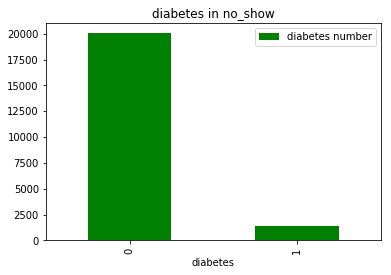

In [187]:
df.query('no_show == 1').groupby('diabetes').count()['age'].plot(kind="bar", title="diabetes in no_show",color='green', legend=True, label="diabetes number")

In [188]:
# 酗酒与爽约 分析方法2
# 无酗酒
df.query('alcoholism == 0 and no_show == 1')['age'].count() / df.shape[0]

0.19550399112456635

In [189]:
# 无酗酒
df.query('alcoholism == 1 and no_show == 1')['age'].count() / df.shape[0]

0.0062804975507939941

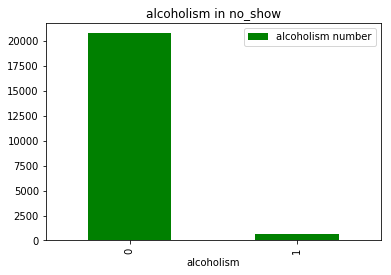

In [191]:
df.query('no_show == 1').groupby('alcoholism').count()['age'].plot(kind="bar", title="alcoholism in no_show",color='green', legend=True, label="alcoholism number")

In [198]:
df['handcap'].describe()

count    106361.000000
mean          0.022856
std           0.163448
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: handcap, dtype: float64

In [192]:
# 无障碍
df.query('handcap == 0 and no_show == 1')['age'].count() / df.shape[0]

0.19803311364127829

In [199]:
# 障碍等级1
df.query('handcap == 1 and no_show == 1')['age'].count() / df.shape[0]

0.0033658953939883982

In [200]:
# 障碍等级2
df.query('handcap == 2 and no_show == 1')['age'].count() / df.shape[0]

0.00034787187032840985

In [204]:
# 障碍等级3
df.query('handcap == 3 and no_show == 1')['age'].count()/ df.shape[0]

2.8205827323925122e-05

In [202]:
# 障碍等级4
df.query('handcap == 4 and no_show == 1')['age'].count() / df.shape[0]

9.401942441308374e-06

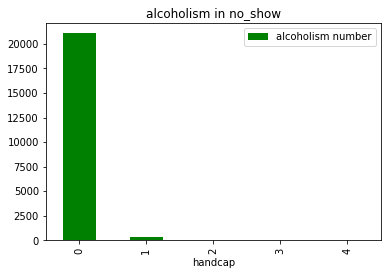

In [194]:
df.query('no_show == 1').groupby('handcap').count()['age'].plot(kind="bar", title="alcoholism in no_show",color='green', legend=True, label="alcoholism number")

In [195]:
# 无短信
df.query('sms_received == 0 and no_show == 1')['age'].count() / df.shape[0]

0.1118267033969218

In [196]:
# 无短信
df.query('sms_received == 1 and no_show == 1')['age'].count() / df.shape[0]

0.089957785278438521

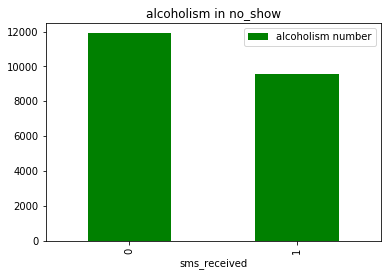

In [197]:
df.query('no_show == 1').groupby('sms_received').count()['age'].plot(kind="bar", title="alcoholism in no_show",color='green', legend=True, label="alcoholism number")

In [341]:
# 查看每个街道的统计样本数量
df.groupby('neighbourhood')['no_show'].count()

neighbourhood
AEROPORTO                 8
ANDORINHAS             2127
ANTÔNIO HONÓRIO         257
ARIOVALDO FAVALESSA     266
BARRO VERMELHO          417
BELA VISTA             1821
BENTO FERREIRA          845
BOA VISTA               305
BONFIM                 2688
CARATOÍRA              2465
CENTRO                 3258
COMDUSA                 301
CONQUISTA               808
CONSOLAÇÃO             1320
CRUZAMENTO             1346
DA PENHA               2141
DE LOURDES              297
DO CABRAL               534
DO MOSCOSO              393
DO QUADRO               820
ENSEADA DO SUÁ          229
ESTRELINHA              534
FONTE GRANDE            660
FORTE SÃO JOÃO         1788
FRADINHOS               254
GOIABEIRAS              685
GRANDE VITÓRIA         1061
GURIGICA               1895
HORTO                   166
ILHA DAS CAIEIRAS      1009
                       ... 
PARQUE INDUSTRIAL         1
PARQUE MOSCOSO          786
PIEDADE                 429
PONTAL DE CAMBURI        69
PRAIA 

In [275]:
# neighbourhood的统计信息
df['neighbourhood'].describe()

count             106361
unique                81
top       JARDIM CAMBURI
freq                7488
Name: neighbourhood, dtype: object

In [314]:
# 计算每个街道的爽约率
neighbourhoods = df['neighbourhood'].unique()
total_num = df.shape[0]
l_neighbourhood = []
l_no_show_scale = []
for neighbourhood in neighbourhoods:
    sql = '%s%s%s' % ('neighbourhood == "', neighbourhood, '" and no_show == 1')
    num = df.query(sql)['age'].count()
    no_show_scale = num/total_num
    print('{} 中爽约的比例为 {}'.format(neighbourhood, no_show_scale))
    l_neighbourhood.append(neighbourhood)
    l_no_show_scale.append(no_show_scale)

JARDIM DA PENHA 中爽约的比例为 0.005895017910700351
MATA DA PRAIA 中爽约的比例为 0.0010248117261026128
PONTAL DE CAMBURI 中爽约的比例为 0.00011282330929570049
REPÚBLICA 中爽约的比例为 0.0013162719417831724
GOIABEIRAS 中爽约的比例为 0.0012598602871353223
ANDORINHAS 中爽约的比例为 0.004559942084034561
CONQUISTA 中爽约的比例为 0.0014102913661962562
NOVA PALESTINA 中爽约的比例为 0.0036103458974624156
DA PENHA 中爽约的比例为 0.003958217767790826
TABUAZEIRO 中爽约的比例为 0.005142862515395681
BENTO FERREIRA 中爽约的比例为 0.0017487612940833576
SÃO PEDRO 中爽约的比例为 0.004616353738682411
SANTA MARTHA 中爽约的比例为 0.004531736256710636
SÃO CRISTÓVÃO 中爽约的比例为 0.0033752973364297063
MARUÍPE 中爽约的比例为 0.0039018061131429753
GRANDE VITÓRIA 中爽约的比例为 0.0020308195673226087
SANTO ANDRÉ 中爽约的比例为 0.004531736256710636
SOLON BORGES 中爽约的比例为 0.0006299301435676611
BONFIM 中爽约的比例为 0.00503003920609998
JARDIM CAMBURI 中爽约的比例为 0.013125111648066491
MARIA ORTIZ 中爽约的比例为 0.011225919274922199
JABOUR 中爽约的比例为 0.004061639134645217
ANTÔNIO HONÓRIO 中爽约的比例为 0.00042308740985887687
RESISTÊNCIA 中爽约的比例为 0.0080292588448773

In [315]:
print(l_neighbourhood)
print(l_no_show_scale)

['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI', 'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA', 'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA', 'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE', 'GRANDE VITÓRIA', 'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI', 'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA', 'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ', 'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO', 'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO', 'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA', 'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO', 'SÃO BENEDITO', 'PRAIA DO CANTO', 'BOA VISTA', 'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO JOÃO', 'FONTE GRANDE', 'MORADA DE CAMBURI', 'ENSEADA DO SUÁ', 'SANTOS REIS', 'PIEDADE', 'JESUS DE NAZARETH', 'SANTA LUÍZA', 'SANTA TEREZA', 'CRUZAMENTO', 'ILHA DO PRÍNCIPE', '

In [318]:
print(len(l_neighbourhood))

81


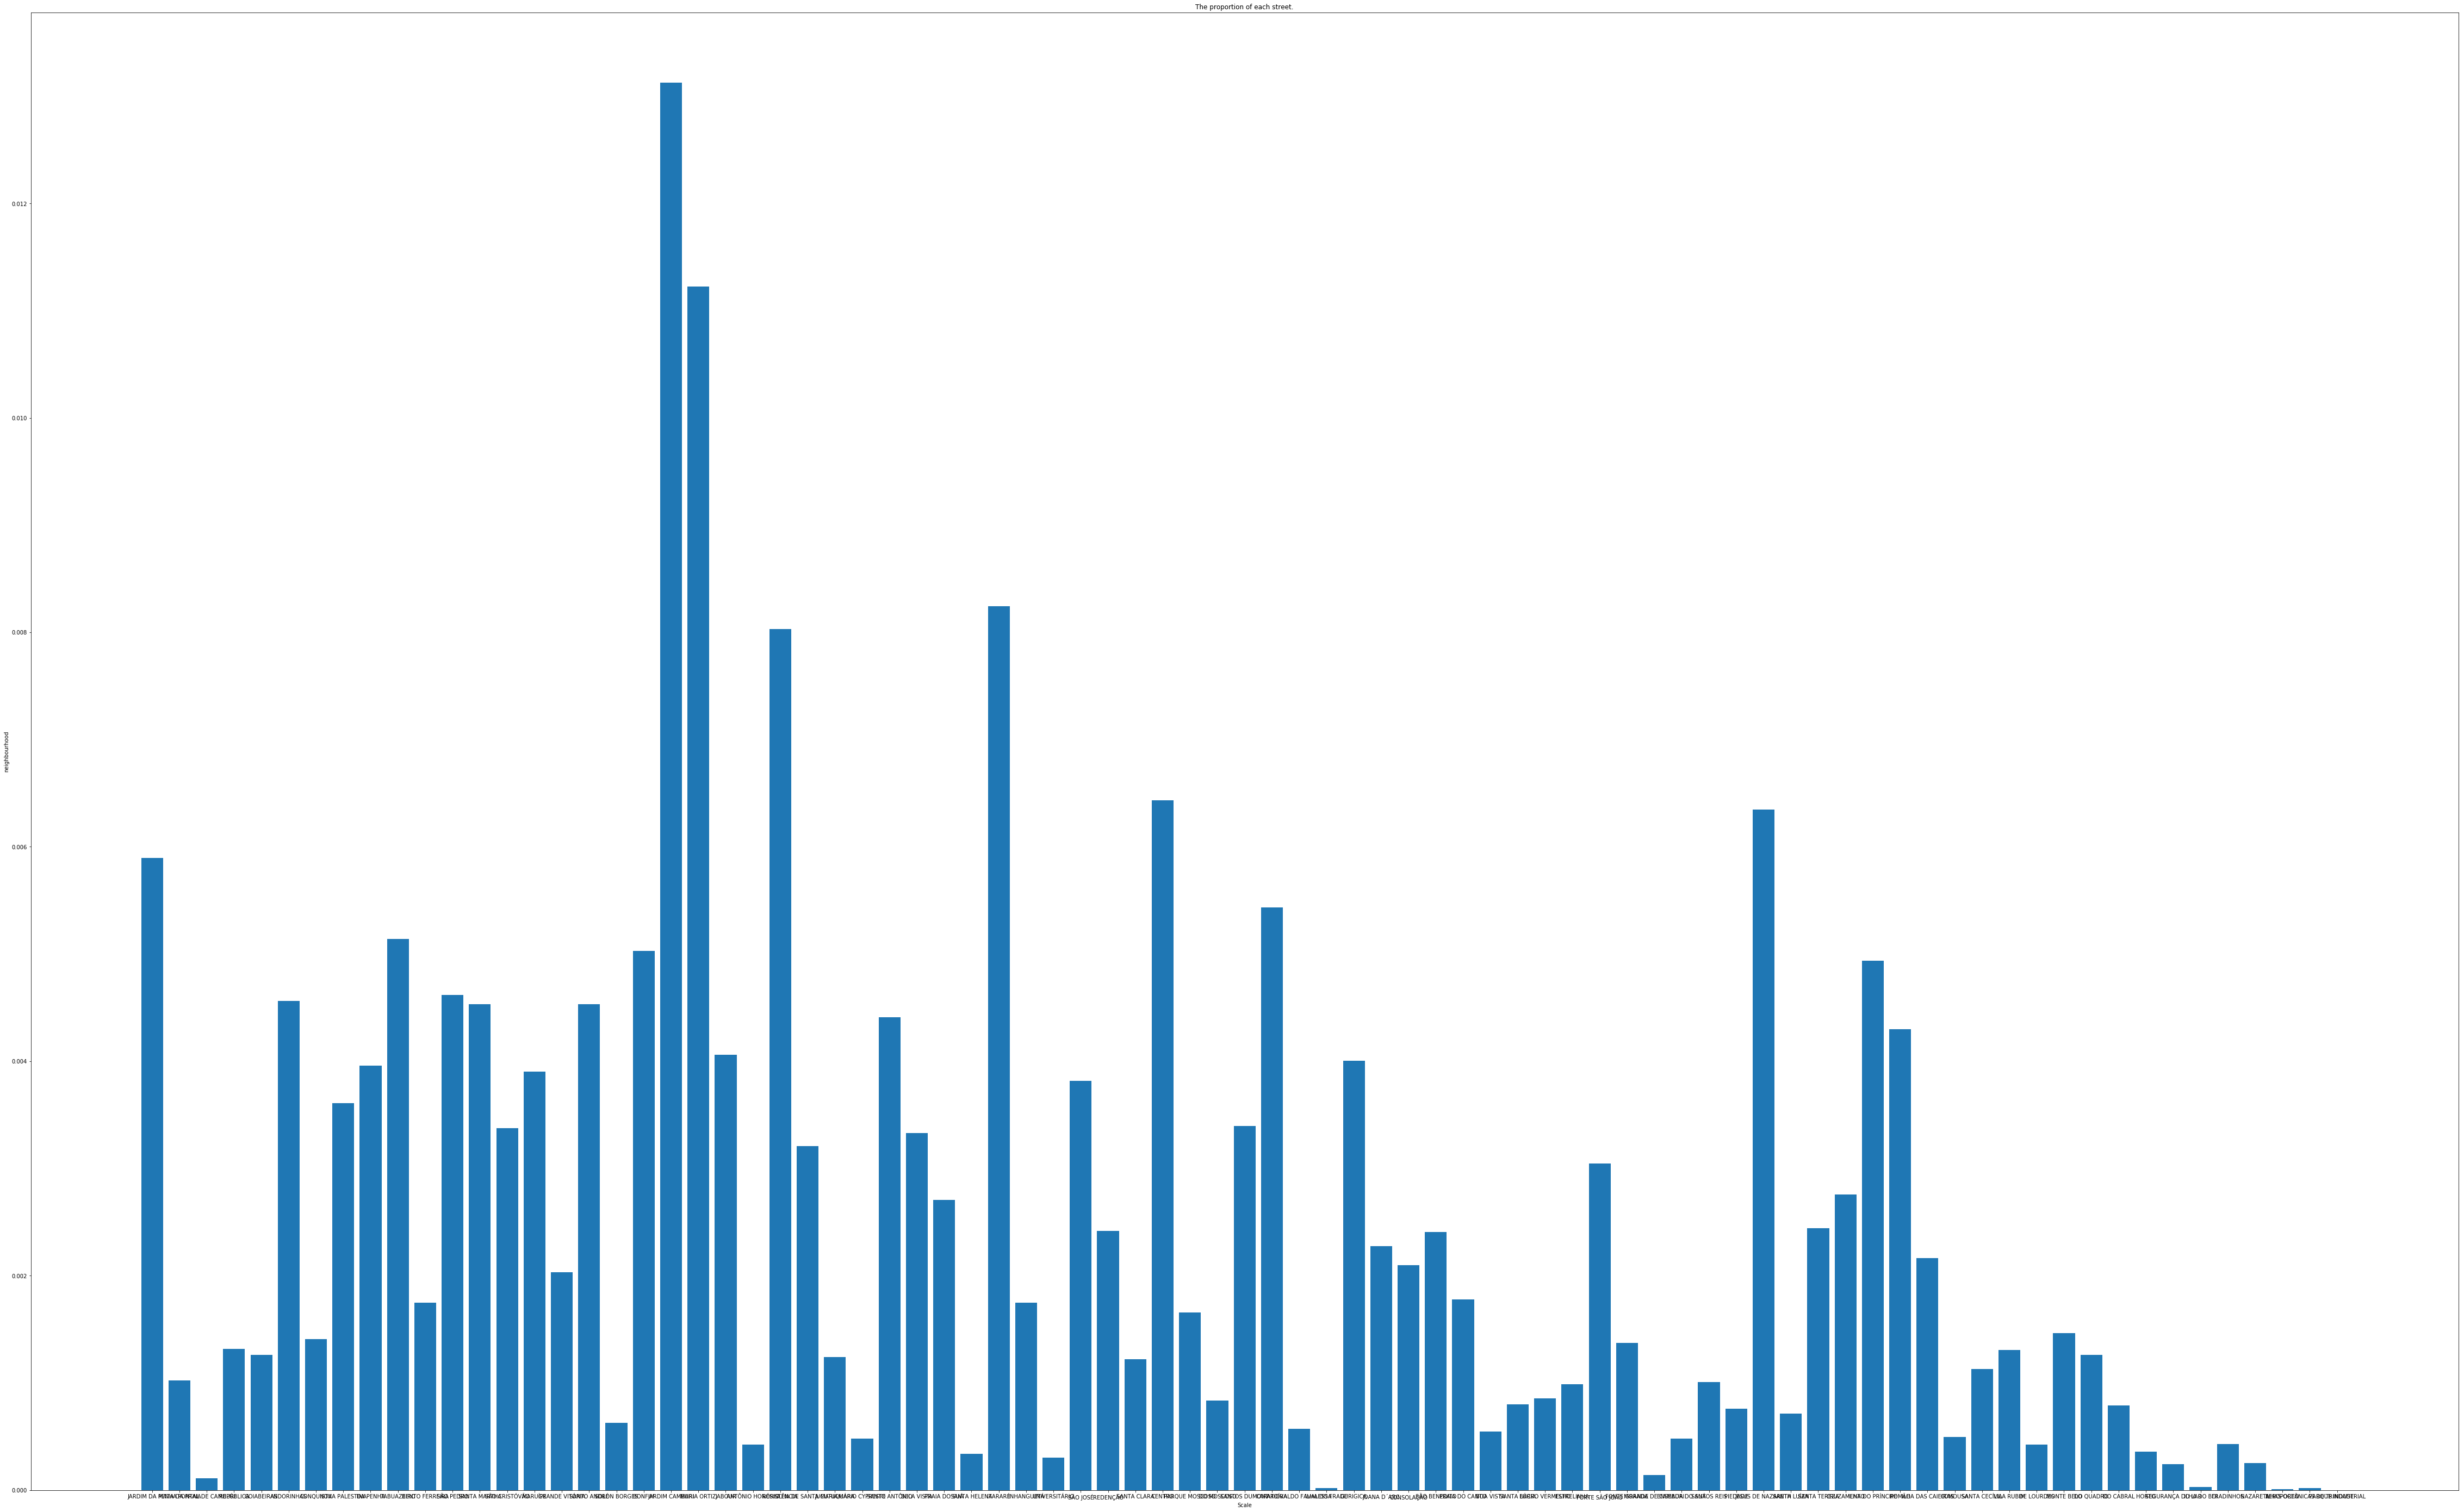

In [335]:
# 显示每个街道爽约比例
plt.figure(figsize=(80,50)) 
plt.bar(list(range(len(l_neighbourhood))), l_no_show_scale, tick_label=l_neighbourhood)
plt.title('The proportion of each street.')
plt.xlabel('Scale')
plt.ylabel('neighbourhood');

In [340]:
#获取爽约比例最大值
max_no_show_scale = max(l_no_show_scale)
#获取爽约比例最大值的索引
max_no_show_scale_index = l_no_show_scale.index(max_no_show_scale)
# 获取对应的街道名字
l_neighbourhood[max_no_show_scale_index]
# 爽约率最高的街道是 JARDIM CAMBURI

'JARDIM CAMBURI'

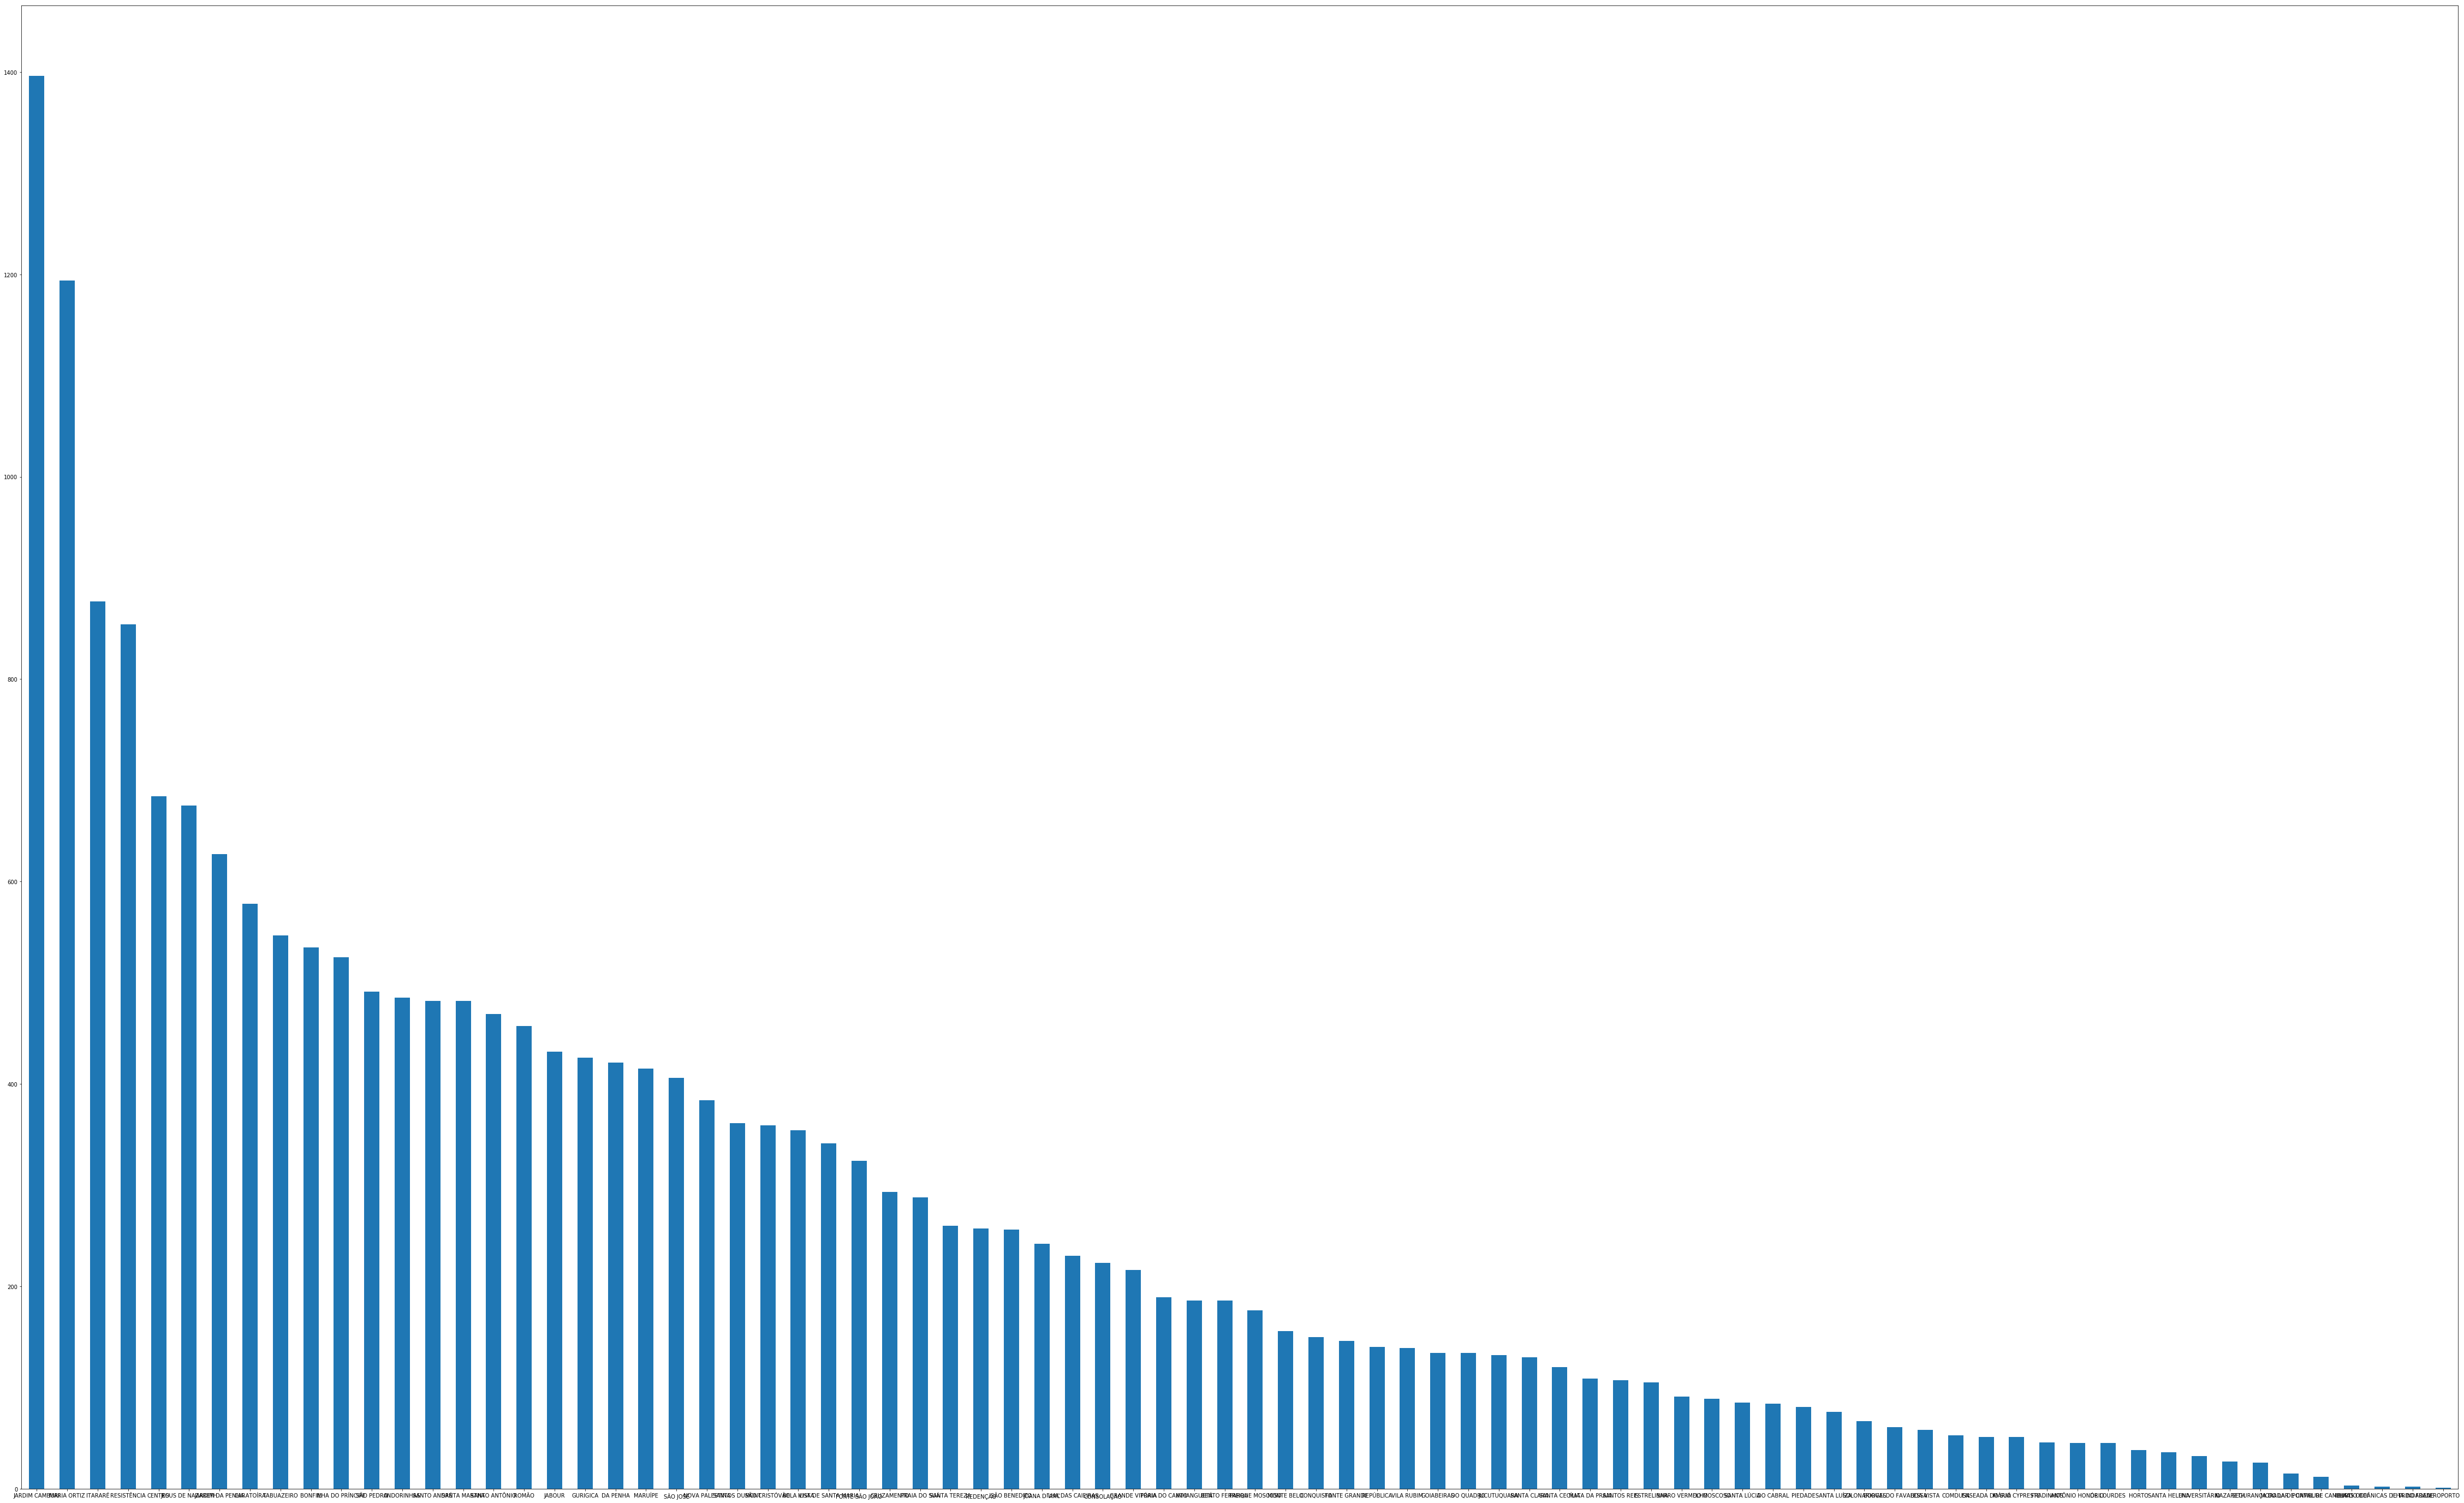

In [353]:
df[df['no_show'] == 1]['neighbourhood'].value_counts()[:].plot(kind='bar', rot=0, figsize=(80, 50));

In [342]:
# 街道UNIVERSITÁRIO的爽约分布
df[df['neighbourhood'] == "UNIVERSITÁRIO"]['no_show'].value_counts()

0    119
1     32
Name: no_show, dtype: int64

In [260]:
universitario = df[df['neighbourhood'] == "UNIVERSITÁRIO"]['no_show'].value_counts()
universitario

0    119
1     32
Name: no_show, dtype: int64

In [261]:
sum(universitario)

151

In [266]:
result = df[(df['neighbourhood'] == "UNIVERSITÁRIO") & (df['no_show'] == 1)]['no_show'].value_counts()
result

1    32
Name: no_show, dtype: int64

In [263]:
(result/sum(universitario)).get_value(label=1)

0.2119205298013245

In [264]:
df[(df['neighbourhood'] == "UNIVERSITÁRIO") & (df['no_show'] == 0) & (df['age'] == 65)]['appointment_day']

147     2016-04-29
72190   2016-05-09
Name: appointment_day, dtype: datetime64[ns]

In [265]:
df.loc[147]

gender                               F
scheduled_day      2016-04-29 08:48:03
appointment_day    2016-04-29 00:00:00
age                                 65
neighbourhood            UNIVERSITÁRIO
scholarship                          0
hipertension                         1
diabetes                             0
alcoholism                           0
handcap                              1
sms_received                         0
no_show                              0
Name: 147, dtype: object

In [343]:
universitario.get_value(label=0)

119

In [232]:
df[df['neighbourhood'] == "UNIVERSITÁRIO"]['no_show'].value_counts()

0    119
1     32
Name: no_show, dtype: int64

In [245]:
df[df['neighbourhood'] == "UNIVERSITÁRIO"]['no_show'].value_counts()

0    119
1     32
Name: no_show, dtype: int64

<a id='conclusions'></a>
## 结论

> **提示**：最后，总结你的调查结果。确保了解探索结果的限制。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相互关系推导出因果关系！

> **提示**：如果对报告满意，应将其副本保存为 HTML 或 PDF 形式。导出报告之前请检查一遍，确保报告流程完整。应删除所有类似的“提示”引用段，以保持报告简洁。还需要查看课程结尾的项目提交页的项目审阅规范。

> 如需将报告导出到工作区，应运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，提交你的项目。恭喜！

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])